# LAB2 - Drzewa decyzyjne

Przedmiot: _Sztuczna Inteligencja w Systemach Informatycznych_

Autor: Tomasz Szydło

kontakt: tszydlo@agh.edu.pl

# Wprowadzenie

Drzewa decyzyjne (DT) to nadzorowana metoda uczenia stosowana do problemu klasyfikacji i regresji. Celem jest stworzenie modelu, który przewiduje wartość zmiennej docelowej poprzez naukę prostych reguł decyzyjnych wywnioskowanych z danych.

Zalety drzew decyzyjnych to:
* łatwe do zrozumienia i wizualizacji;
* wymagają niewielkiego przygotowania danych;
* koszt korzystania z drzewa (tj. przewidywania danych) jest logarytmiczny;
* drzewa decyzyjne są w znacznym stopniu interpretowalne tzn. możliwe jest wyjaśnienie jakie własności danych wejściowych przyczyniły się do uzyskania wyniku.

Wady drzew decyzyjnych obejmują:
* proces uczenia drzew decyzyjnych może tworzyć nadmiernie złożone drzewa, które nie generalizują dobrze danych; 
* drzewa decyzyjne mogą być niestabilne, ponieważ niewielkie różnice w danych mogą spowodować wygenerowanie zupełnie innego drzewa; 
* istnieją pojęcia trudne do nauczenia, ponieważ drzewa decyzyjne nie wyrażają ich łatwo, takie jak XOR.

## Drzewa decyzyjne - przykład na zbiorze Iris

Zbiór danych *iris*  zawiera 150 instancji opisujących kwiaty Irysa. Kwiaty są określone przy pomocy 4 atrybutów numerycznych opisujących długości i szerokości płatków kwiatu *sepal* i *petal*. Ostatni atrybut jakościowy definiuje gatunek opisywanego Irysa (species). Jednym z problemów możliwych do rozwiązania przy użyciu tego zbioru uczącego jest określenie gatunku dla nowego kwiatu Irysa w zależności od wielkości jego płatków. Jest to przykład zadania klasyfikacji.

Zbiór uczący *iris* jest zbiorem etykietowanym ponieważ klasa, czyli konkretny gatunek irysa jest znany dla każdej instancji (obiektu) w zbiorze uczącym:

https://archive.ics.uci.edu/ml/datasets/iris

```
Source:

Creator:

R.A. Fisher

Donor:

Michael Marshall (MARSHALL%PLU '@' io.arc.nasa.gov)

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
```


In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

%matplotlib inline

iris = load_iris()

X, y = load_iris(return_X_y=True)

print('Class labels:', np.unique(y))

print(X)
print(y)

Class labels: [0 1 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

In [2]:
# przygotowanie danych treningowych

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [3]:
# uczenie modelu
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [4]:
# jakość modelu
clf.score(X_test, y_test)

0.9777777777777777

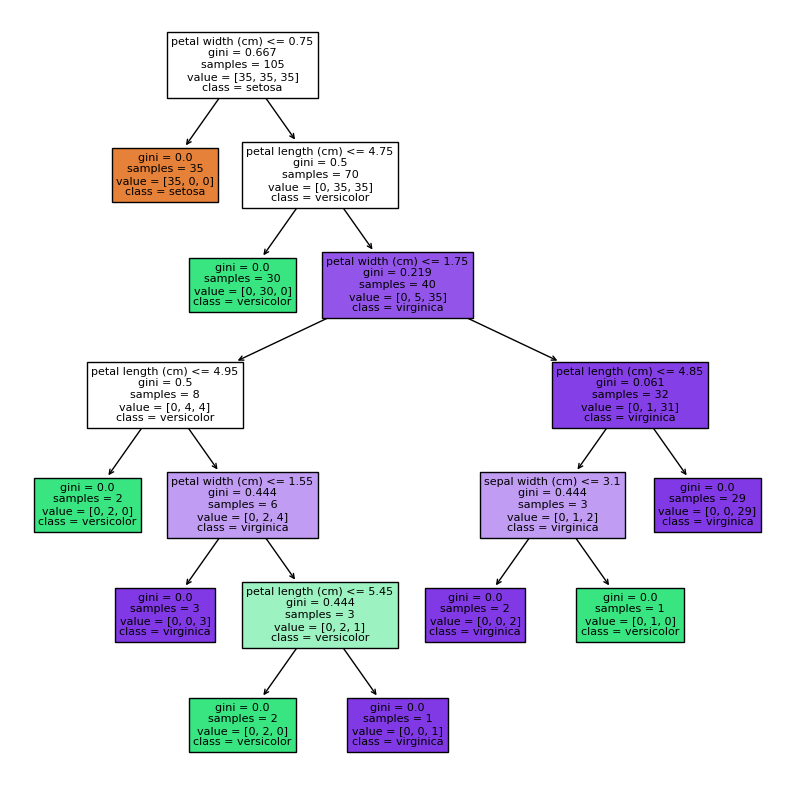

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# System komputerowy - Interpretacja drzew decyzyjnych

Drzewo decyzyjne zostanie opracowane w celu predykcji kodu błędu odpowiedzi serwera WWW w sieci lokalnej. Dodatkowo, na podstawie analizy drzewa decyzyjnego zostaną zidentyfikowane urządzenia z uszkodzonymi kartami sieciowymi skutkujące błędnymi odpowiedziami serwera. 

System komputerowy jest opisany modelem, który posłuży do wygenerowania danych treningowych. 

## Model systemu komputerowego

System komputerowy składa się z 4 komputerów (C1-C4) oraz czterech serwerów WWW (WWW1-WWW4). Zakłada się, że komputery żądają dostępu do treści na serwerach WWW. Zarówno komputery jak i serwery mają uszkodzone w różnym stopniu karty sieciowe skutkujące niepoprawnymi żądaniami dostępu do treści.

Funkcja *get_log()* zwraca trójkę *(komputer_klienta, serwer, kod_bledu)*.

In [6]:
import random

computers = ["C1", "C2", "C3", "C4"]
sites = ["WWW1", "WWW2", "WWW3", "WWW4"]
errors = ["200", "418"]

In [7]:
#model systemu komputerowego

def get_log():
    c = random.randrange(len(computers))
    s = random.randrange(len(sites))
    
    if ( (0.2983*c*c*c - 1.195*c*c + 0.8967*c + 0.9) * (-0.125*s*s*s + 0.445*s*s - 0.44*s + 0.99)) < random.random():
        e=1
    else:
        e=0
        
    return (computers[c], sites[s], errors[e])


In [8]:
print(get_log())

('C3', 'WWW4', '418')


## Przygotowanie danych treningowych

Funkcja *get_log()* zostanie wykorzystana do przygotowania zbioru testowego złożonego z *N* logów.

Przykładowo dla logów: ('C2', 'WWW2', '200'), ('C1', 'WWW3', '418'), ...

Tablice z danymi uczącymi powinny zawierać odpowiednio:
 * CS_X -> (1, 1), (0, 2), ...
 * CS_y -> 200, 418, ...
 


In [9]:
N = 50

CS_X = []
CS_y = []

for n in range(N):
    triple = get_log()
    CS_X.append((int(triple[0][-1]) -1, int(triple[1][-1]) -1))
    CS_y.append(int(triple[2]))
    
    #TODO


Wypisz dane treningowe.

In [10]:
print(CS_X)
print(CS_y)

[(2, 1), (1, 2), (2, 3), (3, 0), (2, 3), (2, 3), (2, 2), (2, 3), (3, 1), (1, 2), (0, 0), (1, 3), (1, 0), (2, 1), (0, 2), (3, 2), (1, 1), (3, 3), (3, 1), (3, 3), (1, 0), (2, 0), (1, 2), (0, 0), (2, 1), (3, 0), (3, 3), (1, 2), (0, 3), (1, 3), (1, 3), (2, 0), (2, 1), (3, 3), (3, 1), (0, 1), (0, 3), (2, 2), (1, 0), (1, 1), (2, 3), (1, 2), (3, 1), (3, 1), (2, 0), (1, 3), (1, 2), (2, 2), (3, 0), (3, 0)]
[418, 200, 418, 418, 418, 418, 418, 418, 200, 200, 200, 418, 200, 418, 200, 200, 418, 418, 200, 418, 200, 418, 200, 200, 418, 200, 418, 200, 418, 418, 418, 418, 418, 418, 200, 200, 418, 418, 200, 200, 418, 418, 200, 200, 418, 418, 200, 418, 200, 200]


Zbuduj drzewo decyzyjne z wykorzystaniem biblioteki *sklearn*, a następnie zwizualizuj drzewo decyzyjne. Kod służący do wizualizacji drzewa jest analogiczny jak w przykładzie dla zbioru IRIS.

In [11]:
cs_clf = tree.DecisionTreeClassifier()
cs_clf = clf.fit(CS_X,CS_y)

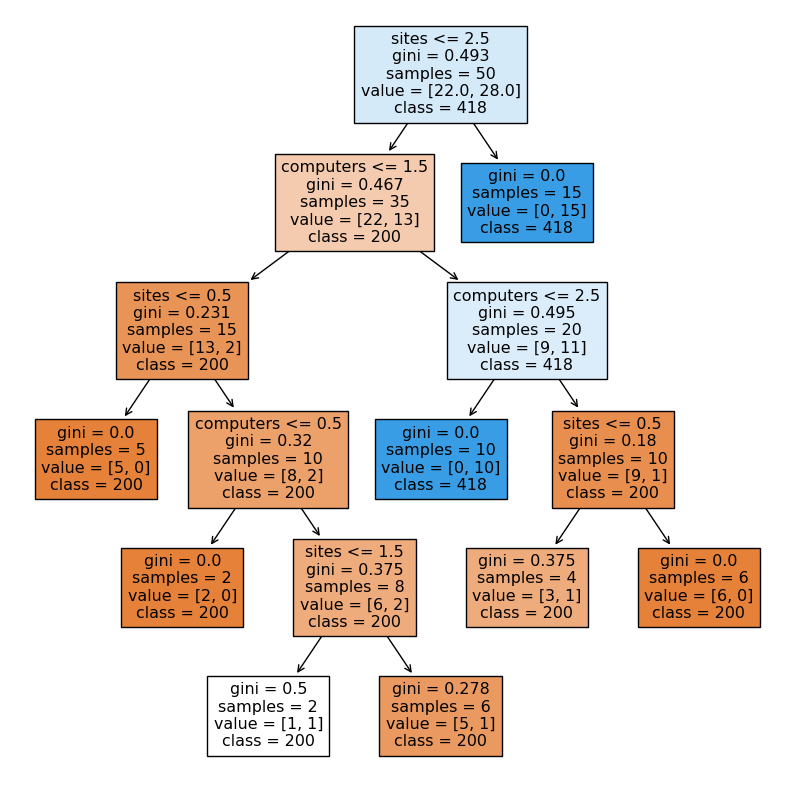

In [12]:
features = ["computers", "sites"]

plt.figure(figsize=(10, 10))
tree.plot_tree(cs_clf, filled=True, feature_names=features, class_names=errors)
plt.show()

Czy uzyskane drzewo decyzyjne jest odpowiednie do rodzaju danych wejściowych?

**UWAGA!**

Algorytm budowy drzew decyzyjnych z biblioteki *sklearn* nie pozwala na stosowanie cech jakościowych (categorical data) w wektorze wejściowym - issue #5442.

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

_The recommended approach of using Label Encoding converts to integers which the DecisionTreeClassifier() will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense._

_Using a OneHotEncoder is the only current valid way, allowing arbitrary splits not dependent on the label ordering, but is computationally expensive._

Uzupełnij kod dokonujący transformacji danych wejściowych zgodnie z metodą *OneHotEncoding*.


In [13]:
#features_onehot = ["C1", "C2", "C3", "C4", "WWW1", "WWW2", "WWW3", "WWW4"]

features_onehot = computers + sites

CS_X_onehot=[]


for feature in CS_X:
    one_hot = [0] * len(features_onehot)
    one_hot[int(feature[0])] = 1 
    one_hot[4 + int(feature[1])] = 1 
    CS_X_onehot.append(one_hot)
          


Wypisz dane wejściowe.

In [14]:
print(CS_X_onehot)

[[0, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0

Korzystając z danych uczących *CS_X_onehot, CS_y* zbuduj drzewo decyzyjne,a następnie je zwizualizuj.

In [15]:
cs_clf_onehot = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
cs_clf_onehot = cs_clf_onehot.fit(CS_X_onehot, CS_y)


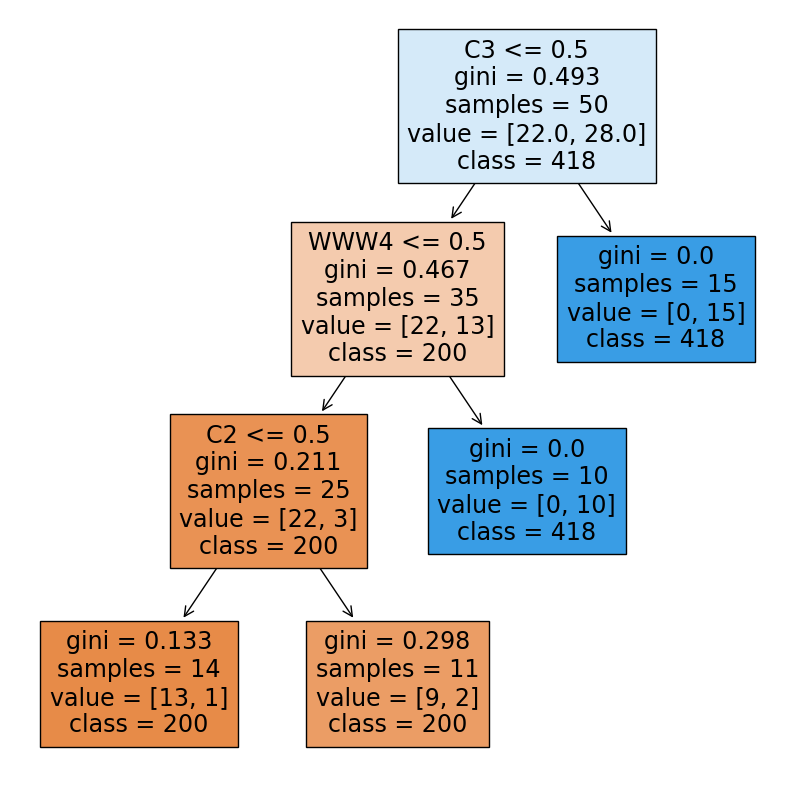

In [16]:
features_onehot = computers + sites

plt.figure(figsize=(10, 10))
tree.plot_tree(cs_clf_onehot, filled=True, feature_names=features_onehot, class_names=errors)
plt.show()

Sprawdź jak zmienia się kształt drzewa decyzyjnego dla różnych wartości parametrów przekazywanych do konstruktora *DecisionTreeClassifier(...)*:
 * max_depth    
 * min_samples_leaf

Dodaj te parametry podczas tworzenia klasyfikatora. Wnioski opisz poniżej.

**Jaki wpływ na kształt drzewa ma parametr *max_depth*?**

Określa on maksymalną głębokość drzewa, czyli maksymalną liczbę poziomów od korzenia do liści.
Zbyt duża wartość max_depth może prowadzić do przeuczenia modelu, gdzie drzewo będzie zbyt mocno dopasowane do danych treningowych, a więc będzie słabo generalizowane do nowych danych testowych. Małe wartości max_depth mogą pomóc w zapobieganiu przeuczeniu, ponieważ ograniczają złożoność modelu.

**Jaki wpływ na kształt drzewa ma parametr *min_samples_leaf*?**

Parametr ten określa minimalną liczbę próbek, które muszą znajdować się w liściu w celu utworzenia tego liścia.

Przyjmij wartości parametrów odpowiednio: ***max_depth=3***, ***min_samples_leaf=5***. Przeanalizuj kształt drzewa i odpowiedz na pytania poniżej.

**Który z komputerów ma wadliwą kartę sieciową?**

Kod 200 oznacza, że nadana przez użytkownika akcja, została odebrana przez serwer, zrozumiana oraz zaakceptowana. 

Kod błędu 418 oznacza, że wystąpił błąd w połączeniu.

Zatem komputer C2 ma wadliwą kartę sieciową.

**Który z serwerów ma wadliwą kartę sieciową?**

Wadriwą kartę sieciową ma serwer WWW2.